<center><font size='20' color='red'>Taller de Clustering</font></center>

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [206]:
flights = pd.read_csv('../Data/flights.txt', sep='|')

In [207]:
flights = flights[['TRANSACTIONID', 'AIRLINECODE', 'TAILNUM', 'ARRDELAY', 'CANCELLED', 'FLIGHTNUM']]

In [208]:
flights['CANCELLED'] = flights['CANCELLED'].map({'F': 0, 'T': 1, 'False': 0, 'True': 1, '0': 0, '1': 1})

In [209]:
cancelled = flights.groupby('AIRLINECODE')[['CANCELLED']].sum() / flights.groupby('AIRLINECODE')[['CANCELLED']].count()

In [210]:
clients = flights.groupby('AIRLINECODE')[['TRANSACTIONID']].count()

In [211]:
planes = flights.groupby('AIRLINECODE')[['TAILNUM']].nunique()

In [212]:
delay = flights.groupby('AIRLINECODE')[['ARRDELAY']].mean()

In [213]:
cancelled.reset_index(inplace=True)
clients.reset_index(inplace=True)
planes.reset_index(inplace=True)
delay.reset_index(inplace=True)

In [214]:
airlines = clients.merge(cancelled, on='AIRLINECODE').merge(planes, on='AIRLINECODE').merge(delay, on='AIRLINECODE')

In [215]:
airlines.index = airlines['AIRLINECODE']

In [216]:
airlines.drop(columns=['AIRLINECODE'], inplace=True)

In [217]:
scaler = StandardScaler()
scaler.fit(airlines)
airlines_scaled = scaler.transform(airlines)

In [218]:
vector=np.arange(1,11)

In [219]:
inercias=[]
for k in vector:
    kmeans=KMeans(n_clusters=k,random_state=0)
    kmeans.fit(airlines_scaled)
    inercias.append(kmeans.inertia_)

In [220]:
dfg = pd.DataFrame({'k' : vector, 'inercias': inercias})

<AxesSubplot:xlabel='k', ylabel='inercias'>

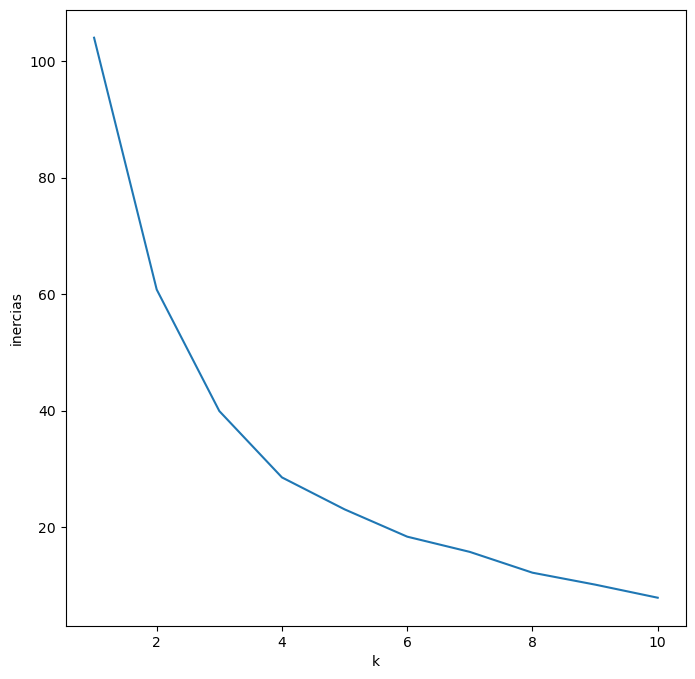

In [221]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=dfg, x='k', y='inercias', markers='o')

In [222]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(airlines_scaled)

KMeans(n_clusters=3, random_state=0)

In [223]:
airlines['cluster'] = kmeans.labels_

Text(0.5, 1.0, 'Retrasos de vuelos en aerolineas por cluster')

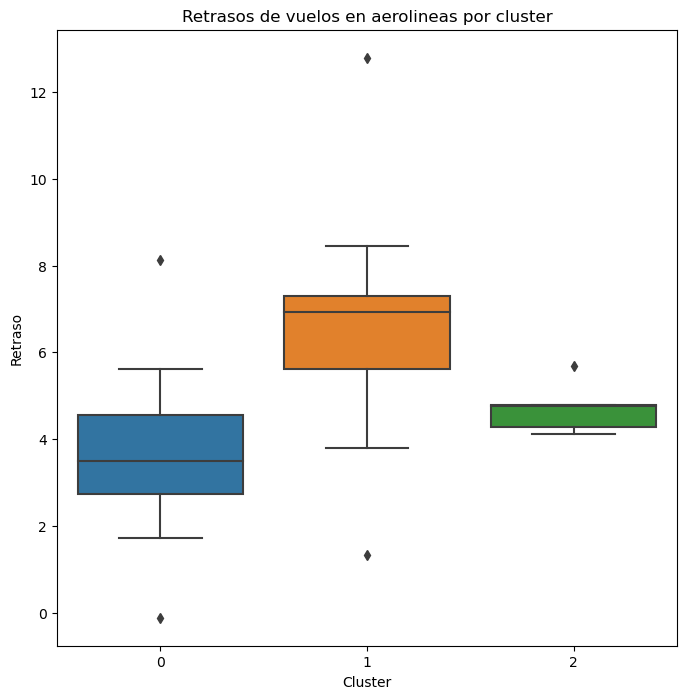

In [224]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=airlines, x='cluster', y='ARRDELAY')
ax.set_xlabel('Cluster')
ax.set_ylabel('Retraso')
plt.title('Retrasos de vuelos en aerolineas por cluster')

Text(0.5, 1.0, 'Número de transacciones en aerolineas por cluster')

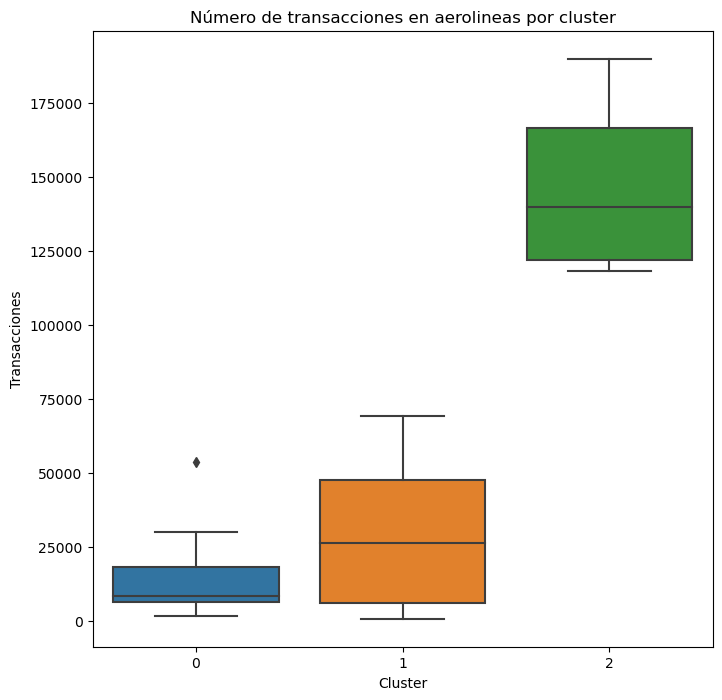

In [225]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=airlines, x='cluster', y='TRANSACTIONID')
ax.set_xlabel('Cluster')
ax.set_ylabel('Transacciones')
plt.title('Número de transacciones en aerolineas por cluster')

Text(0.5, 1.0, 'Cantidad de aviones en aerolineas por cluster')

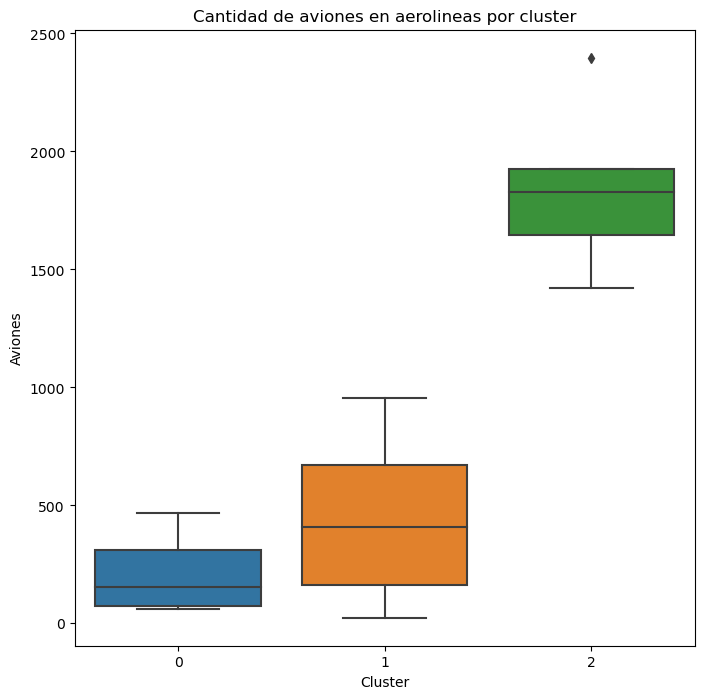

In [226]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=airlines, x='cluster', y='TAILNUM')
ax.set_xlabel('Cluster')
ax.set_ylabel('Aviones')
plt.title('Cantidad de aviones en aerolineas por cluster')

Text(0.5, 1.0, 'Promedio de cancelaciones en aerolineas por cluster')

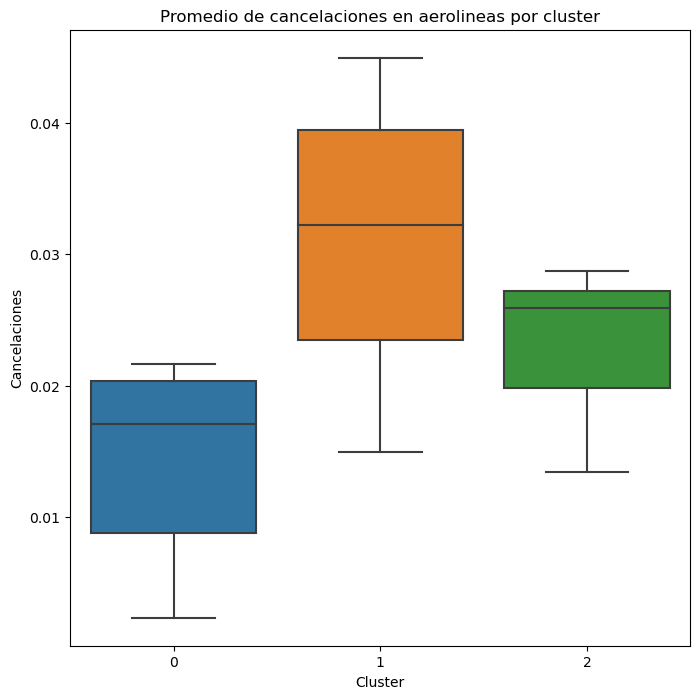

In [227]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=airlines, x='cluster', y='CANCELLED')
ax.set_xlabel('Cluster')
ax.set_ylabel('Cancelaciones')
plt.title('Promedio de cancelaciones en aerolineas por cluster')

Text(0.5, 1.05, 'Pairplot de variables por cluster')

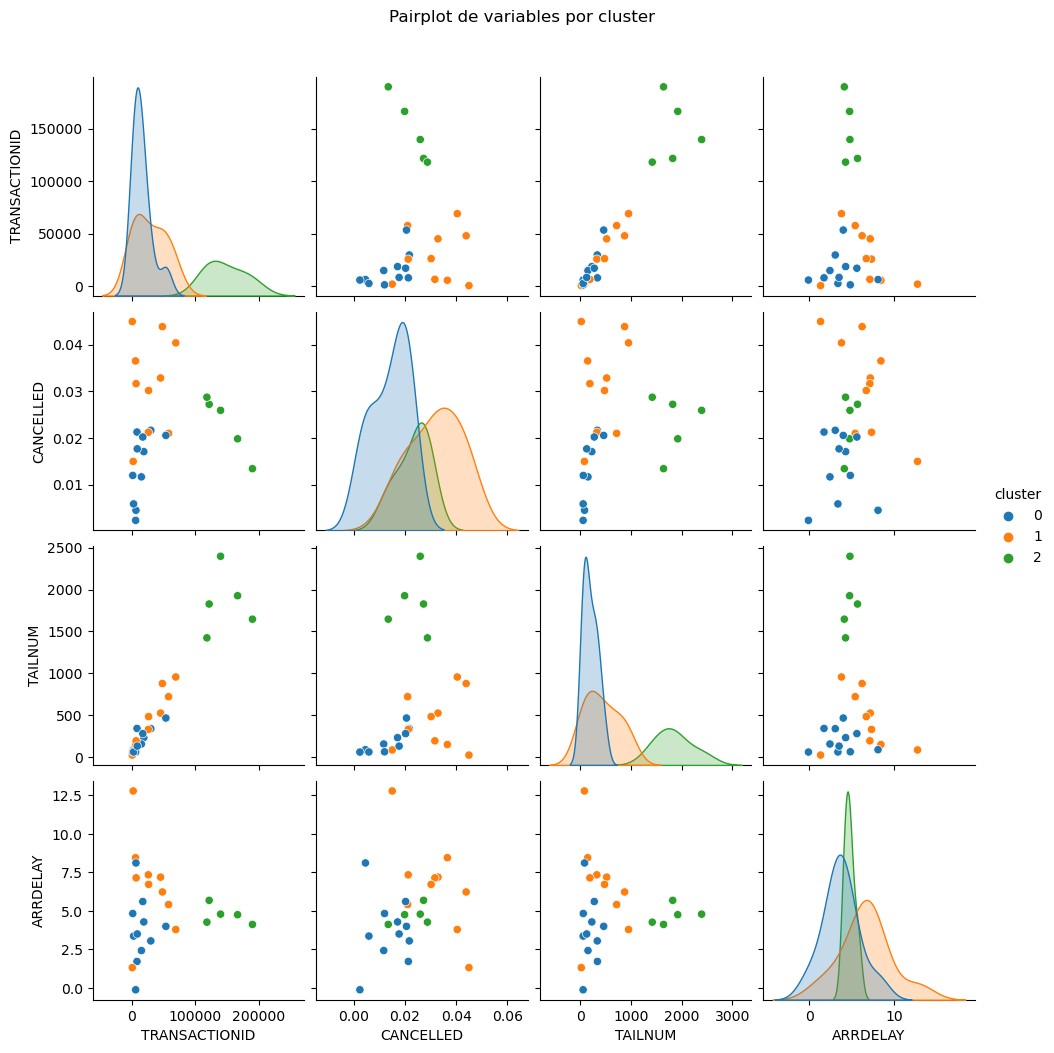

In [228]:
sns.pairplot(data=airlines, hue='cluster', palette='tab10')
plt.suptitle('Pairplot de variables por cluster', y=1.05)

<font size='15' color='Green'>Interpretación</font>

Podemos observar que el cluster 2 que son las aerolíneas que mayor cantidad de pasajeros tiene, también tiene la característica de que son las que tienen mayor cantidad de aviones. Además la desviación típica con respecto al tiempo de retraso es la menor, sin embargo no son los mejores en promedio.
Por otro lado el cluster 0 a pesar de que son los que menor cantidad de pasajeros tiene, y que tienen menor cantidad de aviones, esta agrupación muestra ser más eficientes con respecto al tiempo de retraso y con el porcentaje de vuelos cancelados.
Para finalizar el cluster 1 son los menos eficientes con respecto al tiempo de retraso y la cantidad de vuelos cancelados.